# Finding datasets of interest

In [1]:
import datetime
import pandas as pd
import numpy as np
from erddapy import ERDDAP
from tqdm.notebook import tqdm

We can use ERDDAP's built in search function to find datasets that match a keyword

### Find gridded ice thickness datasets from CoastWatch

In [2]:
e = ERDDAP(
    server="https://coastwatch.noaa.gov/erddap",
    protocol="griddap"
)
url = e.get_search_url(search_for="Ice Thickness", response="csv")

df = pd.read_csv(url)
df[["Dataset ID", "Title"]]

,Dataset ID,Title
0,noaacwVIIRSnppicethickNP06Daily,"Ice Thickness, NOAA S-NPP VIIRS, Near Real-Tim..."
1,noaacwVIIRSnppicethickNP06Daily4Day,"Ice Thickness, NOAA S-NPP VIIRS, Near Real-Tim..."
2,noaacwVIIRSnppicethickSP06Daily,"Ice Thickness, NOAA S-NPP VIIRS, Near Real-Tim..."
3,noaacwVIIRSnppicethickSP06Daily4Day,"Ice Thickness, NOAA S-NPP VIIRS, Near Real-Tim..."
4,noaacwVIIRSnppicethickUW00Daily,"Ice Thickness, NOAA S-NPP VIIRS, Near Real-Tim..."
...,...,...
73,noaacwNPPVIIRSSQnLw410Daily,"nLw410, NOAA S-NPP VIIRS, Science Quality, Glo..."
74,noaacwNPPVIIRSSQnLw443Daily,"nLw443, NOAA S-NPP VIIRS, Science Quality, Glo..."
75,noaacwNPPVIIRSSQnLw486Daily,"nLw486, NOAA S-NPP VIIRS, Science Quality, Glo..."
76,noaacwNPPVIIRSSQnLw551Daily,"nLw551, NOAA S-NPP VIIRS, Science Quality, Glo..."


We can also use the site http://erddap.com/ to search multiple servers

The list of servers is pulled from awesome erddap https://github.com/IrishMarineInstitute/awesome-erddap/blob/master/erddaps.json

### Find ADCP data on the IOOS sensors ERDDAP

In [3]:
e = ERDDAP(
    server="https://erddap.sensors.ioos.us/erddap",
    protocol="tabledap"
)
url = e.get_search_url(search_for="adcp", response="csv")

df = pd.read_csv(url)
df[["Dataset ID", "Title"]]

,Dataset ID,Title
0,noaa_nos_co_ops_t01010,Sunshine Skyway Bridge ADCP
1,ism-caricoos-pr1_doppler_5e96_75,"CARICOOS PR1 (Ponce, PR) Buoy: ADCP Currents data"
2,ism-caricoos-pr2_doppler_34d7_c6,"CARICOOS PR2 (San Juan, PR) Buoy: ADCP Current..."
3,ism-caricoos-pr3_doppler_b3ca_6d,"CARICOOS PR3 (Vieques, PR) Buoy: ADCP Currents..."
4,ism-caricoos-vi1_doppler_200f_7a,"CARICOOS VI1 (St. John, USVI) Buoy: ADCP Curre..."
5,mooring-ob27m-onslow-bay-nc,"Mooring OB27M, Onslow Bay, NC"
6,ce_312_20160122t2140_delayed,IOOS Glider - ce_312-20160122T2140-delayed
7,ce_383_20170131t1942_delayed,IOOS Glider - ce_383-20170131T1942-delayed
8,ism-secoora-edu_usf_marine_comps,Big Carlos Pass Shorebased Tower (NDBC: BGCF1)
9,edu_usf_marine_comps_1407d550,Big Carlos Pass Shorebased Tower (NDBC: BGCF1)


### Find argo floats with chlorophyll and CDOM data

In [4]:
e = ERDDAP(
    server="https://erddap.ifremer.fr/erddap",
)
url = e.get_search_url(search_for="chlorophyll CDOM", response="csv")

df = pd.read_csv(url)
df[["Dataset ID", "Title"]]

,Dataset ID,Title
0,ArgoFloats-synthetic-BGC,Argo float synthetic vertical profiles : BGC data
1,OceanGlidersGDACTrajectories,OceanGliders GDAC trajectories


### Search with allDatasets

For a more sophisticated search, we can use the `allDatasets` dataset from ERDDAP to examine the primary metadata of all datasets. 

### Get metadata for CoastWatch datasets

In [5]:
e = ERDDAP(
    server="https://coastwatch.noaa.gov/erddap",
    protocol="tabledap",
)

# Fetch dataset list
e.dataset_id = "allDatasets"
df_datasets = e.to_pandas()

# drop the allDatasets row and make the datasetID the index for easier reading
df_datasets.set_index("datasetID", inplace=True)
df_datasets.drop("allDatasets", inplace=True)
df_datasets["minTime"] = pd.to_datetime(df_datasets['minTime (UTC)'].str[:-1])
df_datasets["maxTime"] = pd.to_datetime(df_datasets['maxTime (UTC)'].str[:-1])

# Keep a susbset of useful columns
df_datasets = df_datasets[[
 'institution',
 'minLongitude (degrees_east)',
 'maxLongitude (degrees_east)',
 'minLatitude (degrees_north)',
 'maxLatitude (degrees_north)',
 'minAltitude (m)',
 'maxAltitude (m)',
 'minTime',
 'maxTime',
]]

print(f"Found {len(df_datasets)} datasets")

Found 876 datasets


In [6]:
df_datasets

,institution,minLongitude (degrees_east),maxLongitude (degrees_east),minLatitude (degrees_north),maxLatitude (degrees_north),minAltitude (m),maxAltitude (m),minTime,maxTime
datasetID,,,,,,,,,
noaacwNPPN20S3ASCIDINEOFDaily,NOAA NESDIS STAR,-179.958300,179.958300,-89.958340,89.958340,0.0,0.0,2018-10-02 12:00:00,2018-10-02 12:00:00
noaacwNPPN20VIIRSDINEOFDaily,NOAA NESDIS CoastWatch,-179.958300,179.958400,-89.958340,89.958340,0.0,0.0,2020-05-05 12:00:00,2024-02-03 12:00:00
noaacwNPPN20VIIRSSCIDINEOFDaily,NOAA NESDIS CoastWatch,-179.958300,179.958300,-89.958340,89.958340,0.0,0.0,2018-05-30 12:00:00,2023-10-01 12:00:00
noaacwNPPN20VIIRSchlociDaily,NOAA NESDIS CoastWatch,-179.981200,179.981300,-89.756260,89.756250,0.0,0.0,2018-08-09 12:00:00,2021-09-02 12:00:00
noaacwS3AOLCIchlaDaily,Copernicus Program,-179.981250,179.981250,-89.756250,89.756250,0.0,0.0,2019-06-06 12:00:00,2024-02-02 12:00:00
...,...,...,...,...,...,...,...,...,...
noaacwecnEPAsst,Jet Propulsion Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-15 12:00:00,2021-12-15 12:00:00
noaacwNPPN20S3AspmSCIDINEOFDaily,NOAA NESDIS STAR,-179.958300,179.958400,-89.958340,89.958340,0.0,0.0,2018-02-09 12:00:00,2024-01-24 12:00:00
noaacwSpecialProject1,Copernicus Program,-68.015139,-64.946139,16.681188,19.750188,NaN,NaN,2017-07-02 14:51:26,2019-08-29 14:22:52


### Which CoastWatch datasets have been updaated in the last 3 days?

In [7]:
df_datasets[np.datetime64('now') - df_datasets.maxTime < datetime.timedelta(days=3)]

,institution,minLongitude (degrees_east),maxLongitude (degrees_east),minLatitude (degrees_north),maxLatitude (degrees_north),minAltitude (m),maxAltitude (m),minTime,maxTime
datasetID,,,,,,,,,
noaacwNPPN20VIIRSDINEOFDaily,NOAA NESDIS CoastWatch,-179.95830,179.95840,-89.958340,89.958340,0.0,0.0,2020-05-05 12:00:00,2024-02-03 12:00:00
noaacwS3AOLCIchlaSectorAADaily,Copernicus Program,-180.03625,-159.96375,-89.038825,-74.588675,0.0,0.0,2023-11-24 17:38:14,2024-02-03 16:58:41
noaacwS3AOLCIchlaSectorABDaily,Copernicus Program,-180.03625,-159.96375,-75.036250,-59.663750,0.0,0.0,2023-11-24 18:27:14,2024-02-03 17:46:11
noaacwS3AOLCIchlaSectorACDaily,Copernicus Program,-180.03625,-159.96375,-60.111250,-44.738750,0.0,0.0,2023-11-24 20:03:43,2024-02-03 19:22:40
noaacwS3AOLCIchlaSectorADDaily,Copernicus Program,-180.03625,-159.96375,-45.186250,-29.813750,0.0,0.0,2023-11-04 20:17:57,2024-02-03 20:07:10
...,...,...,...,...,...,...,...,...,...
noaacwLEOACSPOSSTL3SnrtKDaily,NOAA/NESDIS/STAR,-179.99000,179.99000,-89.990000,89.990000,NaN,NaN,2023-08-01 12:00:00,2024-02-03 12:00:00
noaacwBLENDEDsstDNDaily,NOAA NESDIS CoastWatch,-179.97500,179.97500,-89.975000,89.975000,NaN,NaN,2019-07-22 12:00:00,2024-02-03 12:00:00
noaacwBLENDEDsstDLDaily,NOAA NESDIS CoastWatch,-179.97500,179.97500,-89.975000,89.975000,NaN,NaN,2019-07-22 12:00:00,2024-02-03 12:00:00


### Find datasets spanning more than 10 years

In [8]:
df_datasets["endurance"] = df_datasets['maxTime'] - df_datasets['minTime']
min_days = 10 * 365
df_datasets[df_datasets["endurance"] > datetime.timedelta(days=min_days)].endurance

datasetID
noaacwNPPVIIRSSCIchlaSectorUWDaily   4402 days 13:50:31
noaacwNPPVIIRSSCIchlaSectorUXDaily   4402 days 13:44:51
noaacwNPPVIIRSSCIchlaSectorUYDaily   4402 days 13:39:09
noaacwNPPVIIRSSCIchlaSectorUZDaily   4402 days 12:55:03
noaacwNPPVIIRSSCIchlaSectorVWDaily   4402 days 14:36:02
                                            ...        
noaacwLEOACSPOSSTL3SCDaily           8710 days 00:00:00
noaacwLEOACSPOSSTL3SKDaily           8710 days 00:00:00
noaacwBLENDEDsstDaily                7825 days 00:00:00
noaacwBLENDEDCsstDaily               7826 days 00:00:00
noaacwecnEPAsst                      5448 days 00:00:00
Name: endurance, Length: 129, dtype: timedelta64[ns]

### Which IOOS glider missions extended to a depth of greater than 150 m in seas north of 70 N?

In [9]:
e_ioos = ERDDAP(
    server="https://gliders.ioos.us/erddap",
    protocol="tabledap",
)
e_ioos.dataset_id = "allDatasets"
df_datasets = e_ioos.to_pandas()
df_datasets.set_index("datasetID", inplace=True)

min_altitude = -150 # note the sign!
min_northing = 70
mask = (df_datasets['maxAltitude (m)'] < min_altitude).values \
* (df_datasets['maxLatitude (degrees_north)'] > min_northing).values
df_datasets[mask]

,accessible,institution,dataStructure,cdm_data_type,class,title,minLongitude (degrees_east),maxLongitude (degrees_east),longitudeSpacing (degrees_east),minLatitude (degrees_north),...,fgdc,iso19115,metadata,sourceUrl,infoUrl,rss,email,testOutOfDate,outOfDate,summary
datasetID,,,,,,,,,,,,,,,,,,,,,
cp_389-20161011T2040-delayed,public,OOI Coastal & Global Scale Nodes (CGSN),table,TrajectoryProfile,EDDTableFromNcFiles,cp_389-20161011T2040-delayed,-71.175203,-47.003674,NaN,39.331109,...,https://gliders.ioos.us/erddap/metadata/fgdc/x...,https://gliders.ioos.us/erddap/metadata/iso191...,https://gliders.ioos.us/erddap/info/cp_389-201...,(local files),https://gliders.ioos.us/erddap/,https://gliders.ioos.us/erddap/rss/cp_389-2016...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,The Pioneer Array is located on the continenta...
unit_595-20180804T0000-delayed,public,"University of Alaska Fairbanks, College of Fis...",table,TrajectoryProfile,EDDTableFromNcFiles,unit_595-20180804T0000-delayed,-168.901621,-155.397927,NaN,67.835807,...,https://gliders.ioos.us/erddap/metadata/fgdc/x...,https://gliders.ioos.us/erddap/metadata/iso191...,https://gliders.ioos.us/erddap/info/unit_595-2...,(local files),https://gliders.ioos.us/erddap/,https://gliders.ioos.us/erddap/rss/unit_595-20...,https://gliders.ioos.us/erddap/subscriptions/a...,NaN,NaN,Shipboard observations of marine mammal distri...


In [10]:
e_ioos.dataset_id = "unit_595-20180804T0000-delayed"
e_ioos.constraints = {"time>=": "2018-09-20"}
ds = e_ioos.to_xarray()

/home/callum/mambaforge/envs/goosdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/home/callum/mambaforge/envs/goosdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


/home/callum/mambaforge/envs/goosdemo/lib/python3.11/site-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


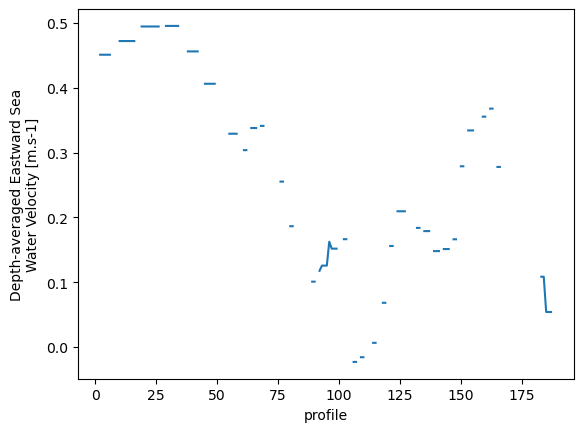

In [11]:
ds.u.plot()

---------------------------
### References

CoastWatch ERDDAP https://coastwatch.noaa.gov/erddap

IOOS ERDDAP https://gliders.ioos.us/erddap

Awesome ERDDAP https://github.com/IrishMarineInstitute/awesome-erddap

More info on using ERDDAP's inbuilt search https://ioos.github.io/erddapy/01b-tabledap-output.html